In [ ]:
import os
import dask.dataframe as dd
from dask import delayed

In [ ]:
CWD=os.getcwd()

In [ ]:
from time import sleep

def inc(x):
    sleep(1)
    return x+1

def add(x,y):
    sleep(1)
    return x+y 

In [ ]:
%%time
x=inc(1)
y=inc(2)
z=add(x,y)

In [ ]:
@delayed
def inc(x):
    sleep(1)
    return x+1

@delayed
def add(x,y):
    sleep(1)
    return x+y 

In [ ]:
%%time

x=delayed(inc(1))
y=delayed(inc(2))
z=delayed(add(x,y))

In [ ]:
z

In [ ]:
z.visualize()

In [ ]:
# get the result of calculation
z.compute()

In [ ]:
data=[i for i in range(0,10)]

In [ ]:
%%time

results=[]
for i in data:
    y=inc(i)
    results.append(y)
total=sum(results)

In [ ]:
%%time

results=[]
for i in data:
    y=delayed(inc)(i)
    results.append(y)
total=delayed(sum)(results)

total.compute()

In [ ]:
total.visualize()

In [ ]:
df_dd=dd.read_csv(f'{CWD}/../data/traffic_crashes.csv')

In [ ]:
df_dd=df_dd[['CRASH_RECORD_ID','CRASH_DATE','POSTED_SPEED_LIMIT','WEATHER_CONDITION','LIGHTING_CONDITION','REPORT_TYPE','CRASH_TYPE','LATITUDE','LONGITUDE','LOCATION']]
df_dd.sample(frac=1.0)

In [56]:
df_dd.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,REPORT_TYPE,CRASH_TYPE,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,CLEAR,DAYLIGHT,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,CLEAR,DAYLIGHT,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,CLEAR,"DARKNESS, LIGHTED ROAD",ON SCENE,NO INJURY / DRIVE AWAY,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,CLEAR,DAYLIGHT,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,06/03/2018 05:00:00 PM,30,CLEAR,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [57]:
df_dd.tail()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,REPORT_TYPE,CRASH_TYPE,LATITUDE,LONGITUDE,LOCATION
117809,54d55bfcc6627f587abbe0d14c42e51b812f930566fb06...,12/28/2019 01:16:00 AM,35,CLEAR,"DARKNESS, LIGHTED ROAD",NaN,INJURY AND / OR TOW DUE TO CRASH,41.685142,-87.628557,POINT (-87.628556919131 41.685141540233)
117810,f5ac3574d167a5297b3b1fc2f0452c8c7c1207ad725ca3...,02/29/2020 04:45:00 PM,30,CLEAR,DAYLIGHT,NaN,NO INJURY / DRIVE AWAY,41.753453,-87.566413,POINT (-87.566413019363 41.75345316606)
117811,15f6eb6cde6a026a007034c7081b1f3fac747fc3268591...,02/17/2018 08:00:00 AM,30,CLEAR,DAYLIGHT,NaN,NO INJURY / DRIVE AWAY,42.009193,-87.672396,POINT (-87.672396344055 42.009192992271)
117812,376bbadc3c632b81e0185fb1a3ddeed6c0dd52ebb8b3a9...,10/13/2019 01:40:00 AM,30,CLEAR,"DARKNESS, LIGHTED ROAD",NaN,NO INJURY / DRIVE AWAY,41.924150,-87.699151,POINT (-87.699150882692 41.924150305628)
117813,ad95aaea32d4ec23aa4749ee3e1157d2a52f803c0e325d...,03/19/2020 04:50:00 PM,30,RAIN,DAYLIGHT,NaN,NO INJURY / DRIVE AWAY,41.775367,-87.707177,POINT (-87.70717711961 41.775366546433)


In [60]:
%time df_dd['POSTED_SPEED_LIMIT'].max().compute()

CPU times: user 8.45 s, sys: 1.45 s, total: 9.9 s
Wall time: 6.78 s


99

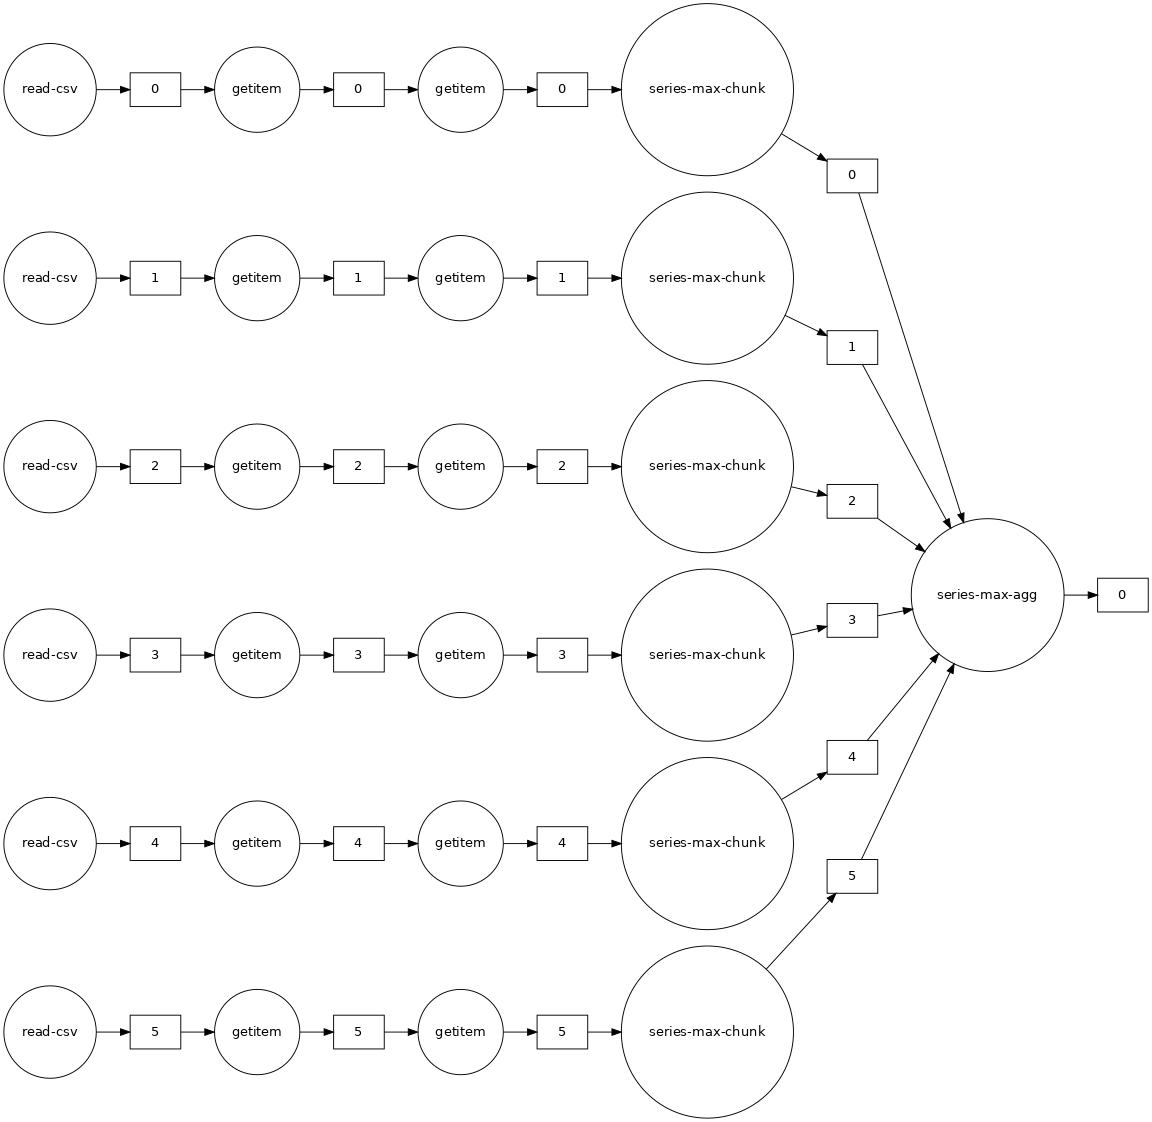

In [61]:
df_dd['POSTED_SPEED_LIMIT'].max().visualize(rankdir='LR',size='12,12!')

In [64]:
df_dd.shape

(Delayed('int-2a5d1003-0880-4886-add1-f10527ae4d2c'), 10)